# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [2]:
import refinitiv.data as rd
import pandas as pd
import numpy as np
import cufflinks as cf  # Cufflinks
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-dark-palette')
import warnings
warnings.filterwarnings('ignore')

In [3]:
rd.open_session()

<refinitiv.data.session.Definition object at 0x7f484ac064c0 {name='codebook'}>

### Numpy

In [4]:
# Python program to demonstrate
# basic array characteristics
import numpy as np
 
# Creating array object
arr = np.array( [[ 1, 2, 3],
                 [ 4, 2, 5]] )
 
# Printing type of arr object
print("Array is of type: ", type(arr))
 
# Printing array dimensions (axes)
print("No. of dimensions: ", arr.ndim)
 
# Printing shape of array
print("Shape of array: ", arr.shape)
 
# Printing size (total number of elements) of array
print("Size of array: ", arr.size)
 
# Printing type of elements in array
print("Array stores elements of type: ", arr.dtype)

Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  2
Shape of array:  (2, 3)
Size of array:  6
Array stores elements of type:  int64


## Python Pandas

In [6]:
import pandas as pd 

data = {
  "sesion": [420, 380, 390],
  "asistencia": [25, 20, 27]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

df

,sesion,asistencia
0,420,25
1,380,20
2,390,27


In [7]:
#utilización de índice:
print(df.loc[2])

sesion        390
asistencia     27
Name: 2, dtype: int64


In [8]:
df = pd.DataFrame(data, index = ["dia1", "dia2", "dia3"])
df 

,sesion,asistencia
dia1,420,25
dia2,380,20
dia3,390,27


# Refinitiv Python

# Extracción de datos estructurados

Las funciones básicas para extraer datos de eikon son las siguiente:
- get_symbology
- get_data
- get_timeseries

get_symbology(symbol, from_symbol_type='RIC', to_symbol_type=None, raw_output=False, debug=False, bestMatch=True)
Devuelve una lista de nombre de instrumentos convertiods en el código del intrumento.

get_data(instruments, fields, parameters=None, field_name=False, raw_output=False, debug=False)
Devuelve un dataframe de pandas con campos en columnas e intrumentos como índice de renglones.

get_timeseries(rics, fields='*', start_date=None, end_date=None, interval='daily', count=None, calendar=None, corax=None, normalize=False, raw_output=False, debug=False)
Devuelve series históricas de uno o varios RICs.
<br>
Referencia: https://docs-developers.refinitiv.com/1594387995587/14684/book/en/eikon/index.html
RICs Reuters instrument code

# Obtener datos

In [12]:
data = rd.get_data(["SPOT.K", "IBM", "GOOG.O", "MSFT.O"], ["TR.PriceClose", "TR.Volume", "TR.PriceLow", "TR.TotalReturnYTD"])

In [13]:
data

,Instrument,Price Close,Volume,Price Low,YTD Total Return
0,SPOT.K,131.57,1129296,131.19,66.649778
1,IBM,140.66,3742058,140.6,3.646567
2,GOOG.O,130.46,23665562,129.85,47.030317
3,MSFT.O,316.88,21257161,316.21,33.034668


In [14]:
type(data)

pandas.core.frame.DataFrame

In [15]:
data.index

RangeIndex(start=0, stop=4, step=1)

# Obtener datos de un índice

In [18]:
dax = rd.get_data('0#.GDAXI', fields=['TR.CommonName', 'TR.PriceClose',
                                      'TR.Volume', 'TR.TotalReturnYTD'])

In [19]:
dax

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,45.555,1785253,5.754354
1,IFXGn.DE,Infineon Technologies AG,31.995,4566699,14.165032
2,SIEGn.DE,Siemens AG,134.4,1488881,7.822214
3,EONGn.DE,E ON SE,11.195,4249350,24.837148
4,DBKGn.DE,Deutsche Bank AG,9.87,8230173,-3.526533
5,SATG_p.DE,Sartorius AG,354.2,78284,-0.028677
6,SAPG.DE,SAP SE,124.18,2249024,30.713026
7,BAYGn.DE,Bayer AG,50.32,2365030,10.675026
8,RWEG.DE,RWE AG,38.35,1333331,-5.469801
9,1COV.DE,Covestro AG,47.9,582288,33.077975


In [20]:
dax[0:5]

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,45.555,1785253,5.754354
1,IFXGn.DE,Infineon Technologies AG,31.995,4566699,14.165032
2,SIEGn.DE,Siemens AG,134.4,1488881,7.822214
3,EONGn.DE,E ON SE,11.195,4249350,24.837148
4,DBKGn.DE,Deutsche Bank AG,9.87,8230173,-3.526533


In [21]:
dax.set_index('Instrument')['YTD Total Return']

Instrument
BASFn.DE      5.754354
IFXGn.DE     14.165032
SIEGn.DE      7.822214
EONGn.DE     24.837148
DBKGn.DE     -3.526533
SATG_p.DE    -0.028677
SAPG.DE      30.713026
BAYGn.DE     10.675026
RWEG.DE      -5.469801
1COV.DE      33.077975
HNKG_p.DE    13.647668
ZALG.DE     -17.034129
DTEGn.DE      5.177214
MRCG.DE     -10.220541
PSHG_p.DE     1.629239
VOWG_p.DE     5.736381
BMWG.DE      29.015943
BEIG.DE      12.590574
HEIG.DE      49.714037
RHMG.DE      35.145821
MTXGn.DE      1.799783
FREG.DE      15.837397
DHLn.DE       28.57828
ALVG.DE      16.309975
MUVGn.DE     21.864902
CONG.DE      20.760929
SHLG.DE       0.495456
SY1G.DE     -11.143179
ADSGn.DE     45.759933
HNRGn.DE     10.026046
DTGGe.DE     20.572014
ENR1n.DE    -23.470839
MBGn.DE      18.756708
BNRGn.DE     23.359018
CBKG.DE      17.761293
AIRG.DE      16.164502
VNAn.DE      -4.059412
DB1Gn.DE      3.730894
QIA.DE      -16.081685
P911_p.DE    10.909447
Name: YTD Total Return, dtype: Float64

In [43]:
dax2 = dax.set_index('Instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]

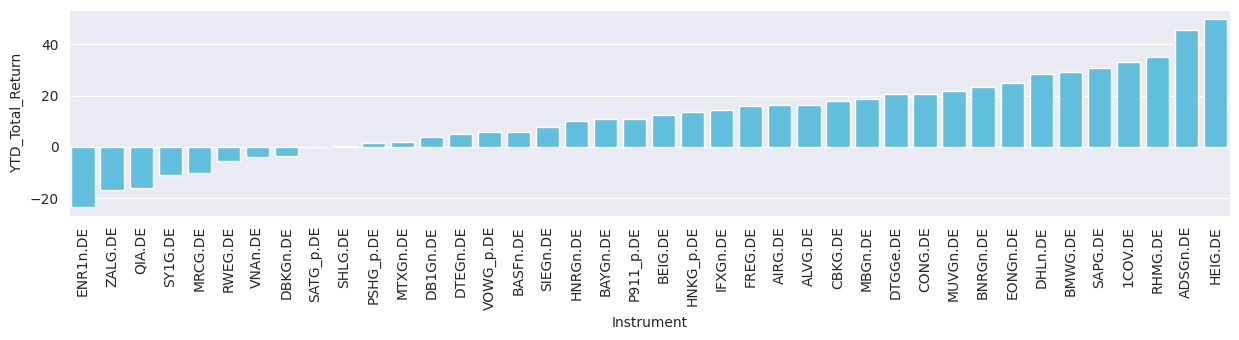

In [44]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

dax2 = dax.set_index('Instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]

bar_plot = sns.barplot(x=dax2.index, y=dax2['YTD_Total_Return'], color="#4CC9F0")
plt.xticks(rotation=90)
plt.show()

In [38]:
type(dax2)

pandas.core.frame.DataFrame

### Generen grafico para volumen de menor a mayor DJI

In [48]:
lp4 = rd.get_data('LP40065886', ['TR.FundHoldingRIC','TR.FundHoldingName',
                           'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares',
                           'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})

In [49]:
lp4

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,LP40065886,AAPL.OQ,APPLE INC ORD,6.6758,10003085.0,-333364.0
1,LP40065886,MSFT.OQ,MICROSOFT CORP ORD,5.8319,4977487.0,-141599.0
2,LP40065886,AMZN.OQ,AMAZON.COM INC ORD,2.6185,5838067.0,-153134.0
3,LP40065886,NVDA.OQ,NVIDIA CORP ORD,2.2889,1572644.0,-34728.0
4,LP40065886,GOOGL.OQ,ALPHABET INC CLASS A ORD,1.6381,3977509.0,-129029.0
...,...,...,...,...,...,...
3488,LP40065886,VAPO.N,VAPOTHERM INC ORD,0.0,13917.0,0.0
3489,LP40065886,WTER.OQ,ALKALINE WATER COMPANY INC ORD,0.0,5421.0,-640.0
3490,LP40065886,ADN.OQ,ADVENT TECHNOLOGIES HOLDINGS INC ORD,0.0,15880.0,0.0
3491,LP40065886,HARP.OQ,HARPOON THERAPEUTICS INC ORD,0.0,19516.0,0.0


In [51]:
XLE= rd.get_data('XLE', ['TR.FundHoldingRIC','TR.FundHoldingName', 'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares', 'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})

In [52]:
XLE

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,XLE,XOM.N,EXXON MOBIL CORP ORD,21.1336,73104182.0,2008421.0
1,XLE,CVX.N,CHEVRON CORP ORD,18.5891,42134747.0,1157529.0
2,XLE,SLB.N,SCHLUMBERGER NV ORD,5.4198,34461863.0,946713.0
3,XLE,EOG.N,EOG RESOURCES INC ORD,4.7205,13212925.0,363035.0
4,XLE,COP.N,CONOCOPHILLIPS ORD,4.6919,14784921.0,406259.0
5,XLE,MPC.N,MARATHON PETROLEUM CORP ORD,4.1253,11504329.0,316086.0
6,XLE,PXD.N,PIONEER NATURAL RESOURCES CO ORD,3.8555,6337658.0,174100.0
7,XLE,PSX.N,PHILLIPS 66 ORD,3.7414,12441956.0,341877.0
8,XLE,VLO.N,VALERO ENERGY CORP ORD,3.4064,9802476.0,269359.0
9,XLE,OXY.N,OCCIDENTAL PETROLEUM CORP ORD,3.3154,19481723.0,535269.0


In [54]:
XLE.columns = [c.replace(' ', '_') for c in XLE.columns]
list_values = ['USD CASH', 'OTHER ASSETS LESS LIABILITIES']
XLE[~XLE['Holding_Name'].isin(list_values)]

,Instrument,Holding_RIC,Holding_Name,Percentage_of_Fund_Assets,Number_of_Shares,Number_of_Shares_Changed
0,XLE,XOM.N,EXXON MOBIL CORP ORD,21.1336,73104182.0,2008421.0
1,XLE,CVX.N,CHEVRON CORP ORD,18.5891,42134747.0,1157529.0
2,XLE,SLB.N,SCHLUMBERGER NV ORD,5.4198,34461863.0,946713.0
3,XLE,EOG.N,EOG RESOURCES INC ORD,4.7205,13212925.0,363035.0
4,XLE,COP.N,CONOCOPHILLIPS ORD,4.6919,14784921.0,406259.0
5,XLE,MPC.N,MARATHON PETROLEUM CORP ORD,4.1253,11504329.0,316086.0
6,XLE,PXD.N,PIONEER NATURAL RESOURCES CO ORD,3.8555,6337658.0,174100.0
7,XLE,PSX.N,PHILLIPS 66 ORD,3.7414,12441956.0,341877.0
8,XLE,VLO.N,VALERO ENERGY CORP ORD,3.4064,9802476.0,269359.0
9,XLE,OXY.N,OCCIDENTAL PETROLEUM CORP ORD,3.3154,19481723.0,535269.0


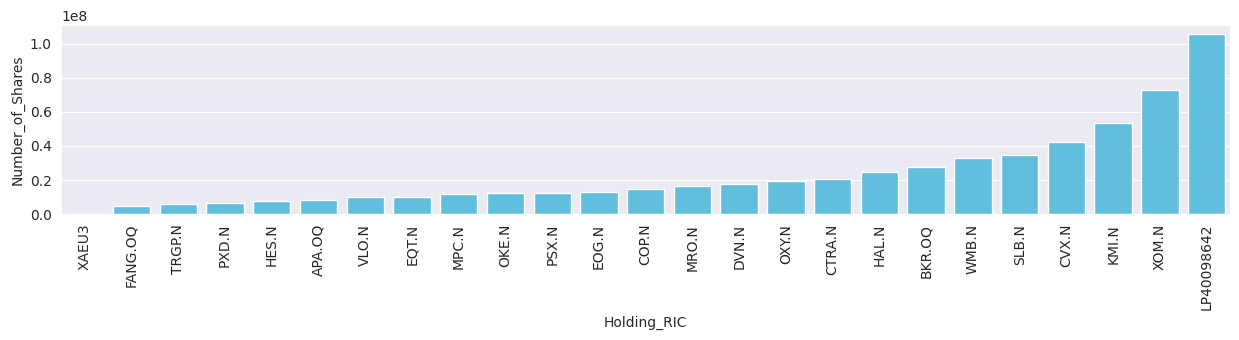

In [55]:
XLE2 = XLE[~XLE['Holding_Name'].isin(list_values)].set_index('Holding_RIC')['Number_of_Shares'].sort_values().to_frame()
type(XLE2)
bar_plot = sns.barplot(x=XLE2.index, y=XLE2['Number_of_Shares'], color="#4CC9F0")
plt.xticks(rotation=90)
plt.show()

In [57]:
help(rd.get_data)

Help on function get_data in module refinitiv.data._fin_coder_layer.get_data_func:

get_data(universe: Union[str, Iterable[str]], fields: Union[str, Iterable[str], NoneType] = None, parameters: Union[str, dict, NoneType] = None, use_field_names_in_headers: bool = False) -> pandas.core.frame.DataFrame
    Retrieves pricing snapshots, as well as Fundamental and Reference data.
    
    Parameters
    ----------
    universe: str | list
        Instruments to request
    fields: str | list, optional
        Fields to request
    parameters: str | dict, optional
        Single key=value global parameter or dictionary of global parameters to request
    use_field_names_in_headers: bool, default False
        If True - returns field name as column headers for data instead of title
    
    Returns
    -------
    pandas.DataFrame
    
    Examples
    --------
    >>> get_data(universe=['IBM.N', 'VOD.L'], fields=['BID', 'ASK'])
    >>> get_data(
    ...     universe=['GOOG.O', 'AAPL.O'],
   

# Descargar series de tiempo

In [59]:
#help(rd.get_timeseries)

In [70]:
df_ts = rd.get_history(universe=["000001.SZ"], fields=["BID", "ASK"], interval="1D",
               start = "2016-06-13", end = "2016-06-20")

In [71]:
df_ts

000001.SZ,BID,ASK
Date,,
2016-06-14,8.65833,8.666663
2016-06-15,8.699997,8.70833
2016-06-16,8.57,8.58
2016-06-17,8.57,8.58
2016-06-20,8.59,8.6


In [72]:
import datetime as dt
today = dt.date.today()
d = today - dt.timedelta(days=100)
print(today, d)

2023-08-18 2023-05-10


In [75]:
df_ts = rd.get_history(universe=["000001.SZ"], fields=["BID", "ASK"], interval="1D",
               start = d, end = today)
df_ts

000001.SZ,BID,ASK
Date,,
2023-05-11,12.84,12.85
2023-05-12,12.62,12.63
2023-05-15,12.82,12.83
2023-05-16,12.61,12.62
2023-05-17,12.49,12.5
...,...,...
2023-08-14,11.67,11.68
2023-08-15,11.73,11.74
2023-08-16,11.72,11.73


# Estadística Básica

In [77]:
dax_corto = dax['Instrument'][0:10].tolist()
dax_corto

['BASFn.DE',
 'IFXGn.DE',
 'SIEGn.DE',
 'EONGn.DE',
 'DBKGn.DE',
 'SATG_p.DE',
 'SAPG.DE',
 'BAYGn.DE',
 'RWEG.DE',
 '1COV.DE']

In [78]:
today = dt.datetime.today()
d = today - dt.timedelta(days=100)
print(today, d)

2023-08-18 22:44:46.262046 2023-05-10 22:44:46.262046


In [82]:
df_ts = rd.get_history(universe=dax_corto, fields=["BID"], interval="1D",
               start = d, end = today)
df_ts

BID,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,1COV.DE
Date,,,,,,,,,,
2023-05-11,47.07,33.2,148.84,11.965,9.569,348.1,122.44,54.1,41.78,39.4
2023-05-12,47.13,33.68,149.96,12.04,9.614,342.1,121.08,53.89,42.35,39.02
2023-05-15,47.775,33.49,150.46,12.035,9.713,340.0,120.22,53.24,42.46,39.39
2023-05-16,47.105,34.185,149.74,12.015,9.611,337.2,121.34,53.77,42.31,39.01
2023-05-17,46.98,34.405,153.02,11.875,9.693,329.6,122.16,53.84,41.83,39.95
...,...,...,...,...,...,...,...,...,...,...
2023-08-14,46.38,33.355,138.5,11.185,9.969,364.9,127.14,52.71,39.09,48.28
2023-08-15,45.72,32.89,137.92,10.975,9.922,368.9,126.22,51.88,38.75,48.16
2023-08-16,45.665,32.93,137.94,10.985,9.893,369.2,127.0,50.94,38.83,48.3


In [83]:
df_ts.describe()

BID,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,1COV.DE
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,46.091042,36.034931,151.943611,11.377639,9.747778,334.350000,123.430556,51.843611,39.666111,44.606806
std,1.593983,1.915250,7.324171,0.246649,0.291296,22.234588,2.183965,1.390182,0.985447,4.499407
min,42.335000,31.970000,134.320000,10.935000,9.081000,292.700000,119.200000,48.640000,38.130000,35.950000
25%,45.277500,34.506250,148.500000,11.226250,9.571250,315.475000,121.945000,50.660000,39.027500,39.625000
50%,46.462500,36.102500,151.730000,11.360000,9.757000,333.650000,123.220000,51.850000,39.480000,47.100000
75%,47.146250,37.445000,157.585000,11.495000,9.923750,354.475000,124.655000,52.617500,40.070000,48.255000
max,49.410000,39.995000,166.220000,12.040000,10.558000,373.700000,128.760000,54.630000,42.460000,50.840000


In [84]:
correlacion = df_ts[dax_corto].corr()
print(correlacion)

BID        BASFn.DE  IFXGn.DE  SIEGn.DE  EONGn.DE  DBKGn.DE  SATG_p.DE  \
BID                                                                      
BASFn.DE   1.000000  0.072971 -0.052438  0.052896  0.769803   0.683035   
IFXGn.DE   0.072971  1.000000  0.533670  0.235889  0.070199  -0.141399   
SIEGn.DE  -0.052438  0.533670  1.000000  0.160043 -0.146010  -0.300764   
EONGn.DE   0.052896  0.235889  0.160043  1.000000 -0.081092  -0.186810   
DBKGn.DE   0.769803  0.070199 -0.146010 -0.081092  1.000000   0.719336   
SATG_p.DE  0.683035 -0.141399 -0.300764 -0.186810  0.719336   1.000000   
SAPG.DE    0.013676  0.307736 -0.047956 -0.199737  0.030974  -0.012189   
BAYGn.DE   0.612403 -0.266999  0.228566  0.066391  0.372451   0.374483   
RWEG.DE    0.027759  0.005774  0.360137  0.736794 -0.129090  -0.167026   
1COV.DE   -0.139773  0.231748 -0.488482 -0.063839  0.142946   0.118000   

BID         SAPG.DE  BAYGn.DE   RWEG.DE   1COV.DE  
BID                                                
BASFn.D

<AxesSubplot:xlabel='BID', ylabel='BID'>

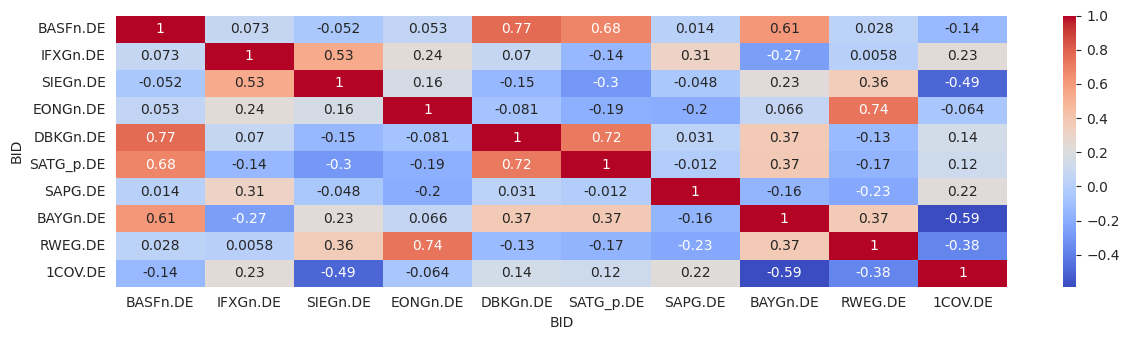

In [86]:
sns.heatmap(df_ts[dax_corto].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
Seleccionar un índice o fondo 
Calcular el rendimiento del fondo o índice 
- 1 año para atrás hoy y 
- lo van comparar a 2 años atrás a 1 año
Filtro de Clenow a los instrumuentos que son más dinámicos del periodo 2 años atrás a 1 año (2021 a 2022)
- rendimientos en el periodo de 1 año para atrás hoy (2022 a 2023)

Si se cumple o no la hipotésis que plantea Clenow